In [53]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Loading the dataset
train_df = pd.read_csv('D:/UNT_MS_CS/SEM-3/MACHINE LEARNING/Project Dataset/training.csv')
test_df = pd.read_csv('D:/UNT_MS_CS/SEM-3/MACHINE LEARNING/Project Dataset/test.csv')
val_df = pd.read_csv('D:/UNT_MS_CS/SEM-3/MACHINE LEARNING/Project Dataset/validation.csv')

train_df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
# Visualize the distribution of labels in each dataset
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
training_df = pd.read_csv('D:/UNT_MS_CS/SEM-3/MACHINE LEARNING/Project Dataset/training.csv')
validation_df = pd.read_csv('D:/UNT_MS_CS/SEM-3/MACHINE LEARNING/Project Dataset/validation.csv')
test_df = pd.read_csv('D:/UNT_MS_CS/SEM-3/MACHINE LEARNING/Project Dataset/test.csv')
datasets = [training_df, validation_df, test_df]
titles = ['Training Set Label Distribution', 'Validation Set Label Distribution', 'Test Set Label Distribution']

for i, data in enumerate(datasets):
    data['label'].value_counts().sort_index().plot(kind='bar', ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Label')
    ax[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Text length distribution for each dataset
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, data in enumerate(datasets):
    data['text_length'] = data['text'].apply(len)
    ax[i].hist(data['text_length'], bins=20)
    ax[i].set_title(f'{titles[i].split()[0]} Text Length Distribution')
    ax[i].set_xlabel('Text Length')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Word Cloud for the training dataset
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(training_df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Training Set Texts")
plt.show()

# Average text length comparison
avg_text_length_per_label = training_df.groupby('label')['text_length'].mean()
avg_text_length_per_label.plot(kind='bar', figsize=(10, 6))
plt.title("Average Text Length by Label in Training Set")
plt.xlabel("Label")
plt.ylabel("Average Text Length")
plt.show()

In [64]:
# DATA PRE-PROCESSING:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline


# lemmatizer and Stop Words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text cleaning:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    # Tokenization and lemmatization of each word. Removing stop words
    tokens = [lemmatizer.lemmatize(word.lower()) for word in text.split() if word.lower() not in stop_words]
    return ' '.join(tokens)

# Applying  preprocessing to training and testing data
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
test_df['cleaned_text'] = test_df['text'].apply(preprocess_text)
val_df['cleaned_text'] = val_df['text'].apply(preprocess_text)

val_df[['text', 'cleaned_text', 'label']].head()


,text,cleaned_text,label
0,im feeling quite sad and sorry for myself but ...,im feeling quite sad sorry ill snap soon,0
1,i feel like i am still looking at a blank canv...,feel like still looking blank canvas blank pie...,0
2,i feel like a faithful servant,feel like faithful servant,2
3,i am just feeling cranky and blue,feeling cranky blue,3
4,i can have for a treat or if i am feeling festive,treat feeling festive,1


In [56]:
# Normalization of the cleaned dataset:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    train_df['cleaned_text'], train_df['label'], test_size=0.15, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Display the shape of the transformed data
X_train_tfidf.shape, X_val_tfidf.shape


((13600, 5000), (2400, 5000))

In [42]:
# LOGISTIC REGRESSION:

# MODEL - 1 : (Default Parameters)
logistic_model_1 = LogisticRegression(max_iter=1000, random_state=42)
logistic_model_1.fit(X_train_tfidf, y_train)

# Prediction :
y_val_pred_1 = logistic_model_1.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_1 = accuracy_score(y_val, y_val_pred_1)
precision_1 = precision_score(y_val, y_val_pred_1, average='weighted')
recall_1 = recall_score(y_val, y_val_pred_1, average='weighted')
f1_1 = f1_score(y_val, y_val_pred_1, average='weighted')

# MODEL - 2 : (tuning hyperparameters -  C = 0.5 and an alternate solver = liblinear)
logistic_model_2 = LogisticRegression(C=0.5, solver='liblinear', max_iter=1000, random_state=42)
logistic_model_2.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_2 = logistic_model_2.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_2 = accuracy_score(y_val, y_val_pred_2)
precision_2 = precision_score(y_val, y_val_pred_2, average='weighted')
recall_2 = recall_score(y_val, y_val_pred_2, average='weighted')
f1_2 = f1_score(y_val, y_val_pred_2, average='weighted')

# MODEL - 3: (tuning hyperparameters - C = 1.0 and solver = liblinear)
logistic_model_3 = LogisticRegression(C= 1.0, solver='liblinear', max_iter=1000, random_state=42)
logistic_model_3.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_3 = logistic_model_3.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_3 = accuracy_score(y_val, y_val_pred_3)
precision_3 = precision_score(y_val, y_val_pred_3, average='weighted')
recall_3 = recall_score(y_val, y_val_pred_3, average='weighted')
f1_3 = f1_score(y_val, y_val_pred_3, average='weighted')


# MODEL - 4: (tuning hyperparameters - C = 0., solver = liblinear and class_weight = balanced)
logistic_model_4 = LogisticRegression(C=0.5, solver='liblinear', class_weight='balanced', max_iter=1000, random_state=42)
logistic_model_4.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_4 = logistic_model_4.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_4 = accuracy_score(y_val, y_val_pred_4)
precision_4 = precision_score(y_val, y_val_pred_4, average='weighted')
recall_4 = recall_score(y_val, y_val_pred_4, average='weighted')
f1_4 = f1_score(y_val, y_val_pred_4, average='weighted')


# Results for the LR Models:
print('Performance Metrics for model 1:', accuracy_1*100, precision_1*100, recall_1*100, f1_1*100)
print('Performance Metrics for model 2:', accuracy_2*100, precision_2*100, recall_2*100, f1_2*100)
print('Performance Metrics for model 3:', accuracy_3*100, precision_3*100, recall_3*100, f1_3*100)
print('Performance Metrics for model 4:', accuracy_4*100, precision_4*100, recall_4*100, f1_4*100)


Performance Metrics for model 1: 86.16666666666667 86.5759674255511 86.16666666666667 85.63676993313466
Performance Metrics for model 2: 81.70833333333334 83.63166932121675 81.70833333333334 80.4156786877585
Performance Metrics for model 3: 85.54166666666667 86.1764008595438 85.54166666666667 84.95090733332263
Performance Metrics for model 4: 87.75 88.00582669810969 87.75 87.80019539710608


In [38]:
# SUPPORT VECTOR MACHINES (SVM):
from sklearn.svm import SVC

# MODEL - 1: (Default Parameters)
svm_1 = SVC(kernel='linear', random_state=42)
svm_1.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_svm_1 = svm_1.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_svm_1 = accuracy_score(y_val, y_val_pred_svm_1)
precision_svm_1 = precision_score(y_val, y_val_pred_svm_1, average='weighted')
recall_svm_1 = recall_score(y_val, y_val_pred_svm_1, average='weighted')
f1_svm_1 = f1_score(y_val, y_val_pred_svm_1, average='weighted')

# MODEL - 2: (tuning hyperparameters C = 0.5)
svm_2 = SVC(kernel='linear', C=0.5, random_state=42)
svm_2.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_svm_2 = svm_2.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_svm_2 = accuracy_score(y_val, y_val_pred_svm_2)
precision_svm_2 = precision_score(y_val, y_val_pred_svm_2, average='weighted')
recall_svm_2 = recall_score(y_val, y_val_pred_svm_2, average='weighted')
f1_svm_2 = f1_score(y_val, y_val_pred_svm_2, average='weighted')

# MODEL - 3: (tuning hyperparameters C = 3.0, gamma = 0.05)
svm_3 = SVC(kernel='linear', C = 3.0, gamma =0.05, random_state=42)
svm_3.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_svm_3 = svm_3.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_svm_3 = accuracy_score(y_val, y_val_pred_svm_3)
precision_svm_3 = precision_score(y_val, y_val_pred_svm_3, average='weighted')
recall_svm_3 = recall_score(y_val, y_val_pred_svm_3, average='weighted')
f1_svm_3 = f1_score(y_val, y_val_pred_svm_3, average='weighted')

# MODEL - 4: (tuning hyperparameters C = 1.5, gamma = 0.05)
svm_4 = SVC(kernel='linear', C=1.5, gamma=0.05, random_state=42)
svm_4.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_svm_4 = svm_4.predict(X_val_tfidf)

# Evaluation Metrics
accuracy_svm_4 = accuracy_score(y_val, y_val_pred_svm_4)
precision_svm_4 = precision_score(y_val, y_val_pred_svm_4, average='weighted')
recall_svm_4 = recall_score(y_val, y_val_pred_svm_4, average='weighted')
f1_svm_4 = f1_score(y_val, y_val_pred_svm_4, average='weighted')

# Results for the SVM Models:
print('Performance Metrics for model 1:', accuracy_svm_1*100, precision_svm_1*100, recall_svm_1*100, f1_svm_1*100)
print('Performance Metrics for model 2:', accuracy_svm_2*100, precision_svm_2*100, recall_svm_2*100, f1_svm_2*100)
print('Performance Metrics for model 3:', accuracy_svm_3*100, precision_svm_3*100, recall_svm_3*100, f1_svm_3*100)
print('Performance Metrics for model 4:', accuracy_svm_4*100, precision_svm_4*100, recall_svm_4*100, f1_svm_4*100)



Performance Metrics for model 1: 87.45833333333334 87.39413913769167 87.45833333333334 87.29247308337773
Performance Metrics for model 2: 86.79166666666667 86.93198736594073 86.79166666666667 86.50642540518444
Performance Metrics for model 3: 86.95833333333334 86.88569900613237 86.95833333333334 86.8623883569858
Performance Metrics for model 4: 87.625 87.54755962648358 87.625 87.49751736946864


In [48]:
# RANDOM FOREST CLASSIFIER:
from sklearn.ensemble import RandomForestClassifier

# Model 1: (Default Parameters)
random_forest_1 = RandomForestClassifier(random_state=42)
random_forest_1.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_rf_1 = random_forest_1.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_rf_1 = accuracy_score(y_val, y_val_pred_rf_1)
precision_rf_1 = precision_score(y_val, y_val_pred_rf_1, average='weighted')
recall_rf_1 = recall_score(y_val, y_val_pred_rf_1, average='weighted')
f1_rf_1 = f1_score(y_val, y_val_pred_rf_1, average='weighted')

# Model 2: (tuning hyperparameters - Increase n_estimators to 150)
random_forest_2 = RandomForestClassifier(n_estimators=150, random_state=42)
random_forest_2.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_rf_2 = random_forest_2.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_rf_2 = accuracy_score(y_val, y_val_pred_rf_2)
precision_rf_2 = precision_score(y_val, y_val_pred_rf_2, average='weighted')
recall_rf_2 = recall_score(y_val, y_val_pred_rf_2, average='weighted')
f1_rf_2 = f1_score(y_val, y_val_pred_rf_2, average='weighted')

# Model 3: (tuning hyperparameters - Increase n_estimators to 200, increase min_samples_split to 4)
random_forest_3 = RandomForestClassifier(n_estimators=200, min_samples_split=4, random_state=42)
random_forest_3.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_rf_3 = random_forest_3.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_rf_3 = accuracy_score(y_val, y_val_pred_rf_3)
precision_rf_3 = precision_score(y_val, y_val_pred_rf_3, average='weighted')
recall_rf_3 = recall_score(y_val, y_val_pred_rf_3, average='weighted')
f1_rf_3 = f1_score(y_val, y_val_pred_rf_3, average='weighted')

# Model 4: (tuning hyperparameters - increase n_estimators to 300, adjust min_samples_split to 4, set max_depth to None)
random_forest_4 = RandomForestClassifier(n_estimators=300, min_samples_split=4, max_depth=None, random_state=42)
random_forest_4.fit(X_train_tfidf, y_train)

# Prediction:
y_val_pred_rf_4 = random_forest_4.predict(X_val_tfidf)

# Evaluation Metrics:
accuracy_rf_4 = accuracy_score(y_val, y_val_pred_rf_4)
precision_rf_4 = precision_score(y_val, y_val_pred_rf_4, average='weighted')
recall_rf_4 = recall_score(y_val, y_val_pred_rf_4, average='weighted')
f1_rf_4 = f1_score(y_val, y_val_pred_rf_4, average='weighted')


# Results for the SVM Models:
print('Performance Metrics for model 1:', accuracy_rf_1*100, precision_rf_1*100, recall_rf_1*100, f1_rf_1*100)
print('Performance Metrics for model 2:', accuracy_rf_2*100, precision_rf_2*100, recall_rf_2*100, f1_rf_2*100)
print('Performance Metrics for model 3:', accuracy_rf_3*100, precision_rf_3*100, recall_rf_3*100, f1_rf_3*100)
print('Performance Metrics for model 4:', accuracy_rf_4*100, precision_rf_4*100, recall_rf_4*100, f1_rf_4*100)



Performance Metrics for model 1: 87.70833333333333 87.68802125347328 87.70833333333333 87.62741225728011
Performance Metrics for model 2: 87.91666666666667 87.93154023506608 87.91666666666667 87.8388347082248
Performance Metrics for model 3: 87.875 87.93971017958026 87.875 87.76207364764869
Performance Metrics for model 4: 87.95833333333334 88.0474746511892 87.95833333333334 87.84687968520288


In [68]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.initializers import Constant
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define parameters
vocab_size = 10000  # Increased vocab size for GloVe coverage
embedding_dim = 100  # Set to 100 to match GloVe embedding dimensions
max_sequence_length = 150
num_classes = len(train_df['label'].unique())  # Set this to the number of unique labels in your dataset

# Tokenizer and padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['cleaned_text'])
X_train_seq = tokenizer.texts_to_sequences(train_df['cleaned_text'])
X_val_seq = tokenizer.texts_to_sequences(val_df['cleaned_text'])
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
y_train_encoded = tf.keras.utils.to_categorical(train_df['label'])
y_val_encoded = tf.keras.utils.to_categorical(val_df['label'])

# Load GloVe embeddings
embedding_index = {}
with open('C:/Users/saisr/Downloads/archive (11)/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.array(values[1:], dtype='float32')
        embedding_index[word] = coefficients

# Prepare embedding matrix for GloVe embeddings
word_index = tokenizer.word_index
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Model 1: Basic Bidirectional LSTM with GloVe embeddings
model_1 = Sequential([
    Embedding(vocab_size, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_sequence_length, trainable=False),
    Bidirectional(LSTM(32)),
    Dense(num_classes, activation='softmax')
])
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.fit(X_train_padded, y_train_encoded, epochs=4, validation_data=(X_val_padded, y_val_encoded), verbose=2)
val_preds_1 = model_1.predict(X_val_padded)
val_preds_labels_1 = tf.argmax(val_preds_1, axis=1)
accuracy_lstm_1 = accuracy_score(val_df['label'], val_preds_labels_1)
precision_lstm_1 = precision_score(val_df['label'], val_preds_labels_1, average='weighted')
recall_lstm_1 = recall_score(val_df['label'], val_preds_labels_1, average='weighted')
f1_lstm_1 = f1_score(val_df['label'], val_preds_labels_1, average='weighted')

# Model 2: Increase LSTM units and add dropout
model_2 = Sequential([
    Embedding(vocab_size, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_sequence_length, trainable=False),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(num_classes, activation='softmax')
])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(X_train_padded, y_train_encoded, epochs=4, validation_data=(X_val_padded, y_val_encoded), verbose=2)
val_preds_2 = model_2.predict(X_val_padded)
val_preds_labels_2 = tf.argmax(val_preds_2, axis=1)
accuracy_lstm_2 = accuracy_score(val_df['label'], val_preds_labels_2)
precision_lstm_2 = precision_score(val_df['label'], val_preds_labels_2, average='weighted')
recall_lstm_2 = recall_score(val_df['label'], val_preds_labels_2, average='weighted')
f1_lstm_2 = f1_score(val_df['label'], val_preds_labels_2, average='weighted')

# Model 3: Add an additional LSTM layer with dropout
model_3 = Sequential([
    Embedding(vocab_size, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_sequence_length, trainable=False),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)),
    LSTM(32),
    Dense(num_classes, activation='softmax')
])
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3.fit(X_train_padded, y_train_encoded, epochs=4, validation_data=(X_val_padded, y_val_encoded), verbose=2)
val_preds_3 = model_3.predict(X_val_padded)
val_preds_labels_3 = tf.argmax(val_preds_3, axis=1)
accuracy_lstm_3 = accuracy_score(val_df['label'], val_preds_labels_3)
precision_lstm_3 = precision_score(val_df['label'], val_preds_labels_3, average='weighted')
recall_lstm_3 = recall_score(val_df['label'], val_preds_labels_3, average='weighted')
f1_lstm_3 = f1_score(val_df['label'], val_preds_labels_3, average='weighted')

# Model 4: Further increase units, add dense layers, and tune dropout
model_4 = Sequential([
    Embedding(vocab_size, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_sequence_length, trainable=False),
    Bidirectional(LSTM(128, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)),
    LSTM(64, dropout=0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model_4.compile(optimizer=Adam(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
model_4.fit(X_train_padded, y_train_encoded, epochs=4, validation_data=(X_val_padded, y_val_encoded), verbose=2)
val_preds_4 = model_4.predict(X_val_padded)
val_preds_labels_4 = tf.argmax(val_preds_4, axis=1)
accuracy_lstm_4 = accuracy_score(val_df['label'], val_preds_labels_4)
precision_lstm_4 = precision_score(val_df['label'], val_preds_labels_4, average='weighted')
recall_lstm_4 = recall_score(val_df['label'], val_preds_labels_4, average='weighted')
f1_lstm_4 = f1_score(val_df['label'], val_preds_labels_4, average='weighted')

# Print performance metrics at the end for each model
print('Performance Metrics for model 1:', accuracy_lstm_1*100, precision_lstm_1*100, recall_lstm_1*100, f1_lstm_1*100)
print('Performance Metrics for model 2:', accuracy_lstm_2*100, precision_lstm_2*100, recall_lstm_2*100, f1_lstm_2*100)
print('Performance Metrics for model 3:', accuracy_lstm_3*100, precision_lstm_3*100, recall_lstm_3*100, f1_lstm_3*100)
print('Performance Metrics for model 4:', accuracy_lstm_4*100, precision_lstm_4*100, recall_lstm_4*100, f1_lstm_4*100)


Epoch 1/4
500/500 - 72s - loss: 1.2356 - accuracy: 0.5414 - val_loss: 0.9337 - val_accuracy: 0.6640 - 72s/epoch - 145ms/step
Epoch 2/4
500/500 - 55s - loss: 0.7853 - accuracy: 0.7175 - val_loss: 0.6114 - val_accuracy: 0.7885 - 55s/epoch - 110ms/step
Epoch 3/4
500/500 - 64s - loss: 0.5465 - accuracy: 0.8098 - val_loss: 0.4849 - val_accuracy: 0.8370 - 64s/epoch - 129ms/step
Epoch 4/4
500/500 - 68s - loss: 0.4167 - accuracy: 0.8512 - val_loss: 0.4007 - val_accuracy: 0.8605 - 68s/epoch - 136ms/step
63/63 [==============================] - 4s 38ms/step
Epoch 1/4
500/500 - 413s - loss: 1.2287 - accuracy: 0.5432 - val_loss: 0.8839 - val_accuracy: 0.6800 - 413s/epoch - 827ms/step
Epoch 2/4
500/500 - 434s - loss: 0.8367 - accuracy: 0.6936 - val_loss: 0.6102 - val_accuracy: 0.7885 - 434s/epoch - 868ms/step
Epoch 3/4
500/500 - 416s - loss: 0.6370 - accuracy: 0.7690 - val_loss: 0.4673 - val_accuracy: 0.8375 - 416s/epoch - 832ms/step
Epoch 4/4
500/500 - 385s - loss: 0.5232 - accuracy: 0.8121 - val_

C:\Users\saisr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/4
500/500 - 526s - loss: 1.6025 - accuracy: 0.3254 - val_loss: 1.5803 - val_accuracy: 0.3520 - 526s/epoch - 1s/step
Epoch 2/4
500/500 - 487s - loss: 1.5862 - accuracy: 0.3285 - val_loss: 1.5876 - val_accuracy: 0.3520 - 487s/epoch - 973ms/step
Epoch 3/4
500/500 - 466s - loss: 1.5843 - accuracy: 0.3252 - val_loss: 1.5845 - val_accuracy: 0.3520 - 466s/epoch - 932ms/step
Epoch 4/4
500/500 - 498s - loss: 1.5833 - accuracy: 0.3275 - val_loss: 1.5849 - val_accuracy: 0.3520 - 498s/epoch - 996ms/step
63/63 [==============================] - 13s 177ms/step
Performance Metrics for model 1: 86.05000000000001 85.96244293219009 86.05000000000001 85.8517142672943
Performance Metrics for model 2: 86.35000000000001 86.2229967313164 86.35000000000001 86.12067712049523
Performance Metrics for model 3: 35.199999999999996 12.3904 35.199999999999996 18.328994082840236
Performance Metrics for model 4: 35.199999999999996 12.3904 35.199999999999996 18.328994082840236


C:\Users\saisr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


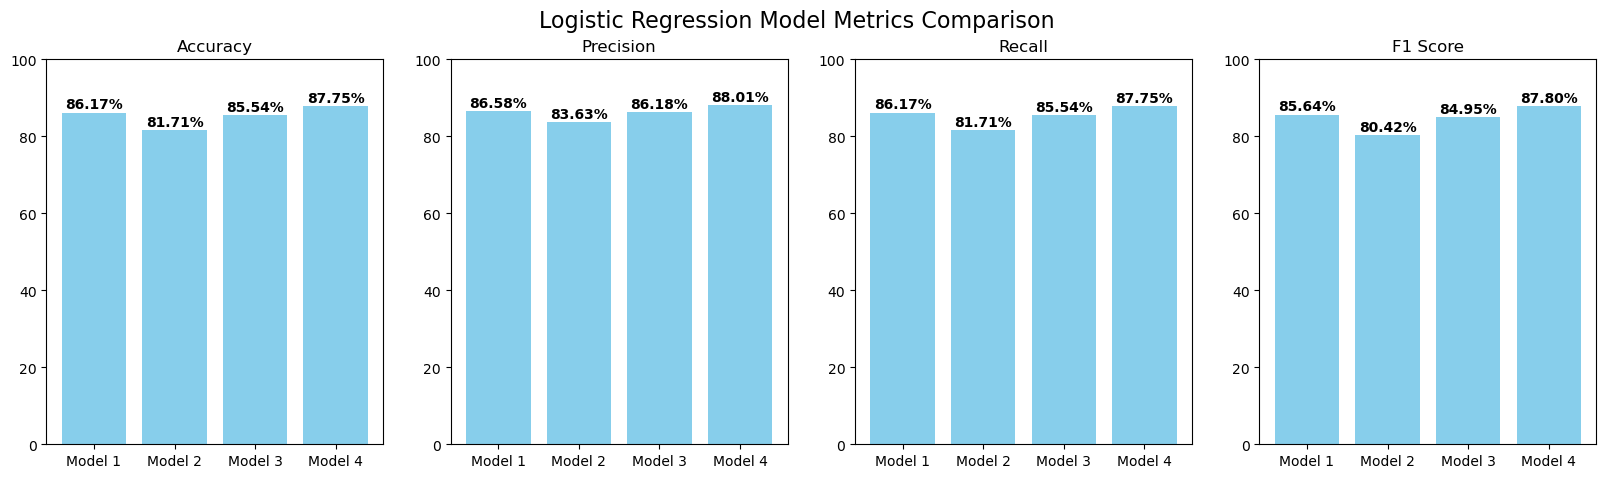

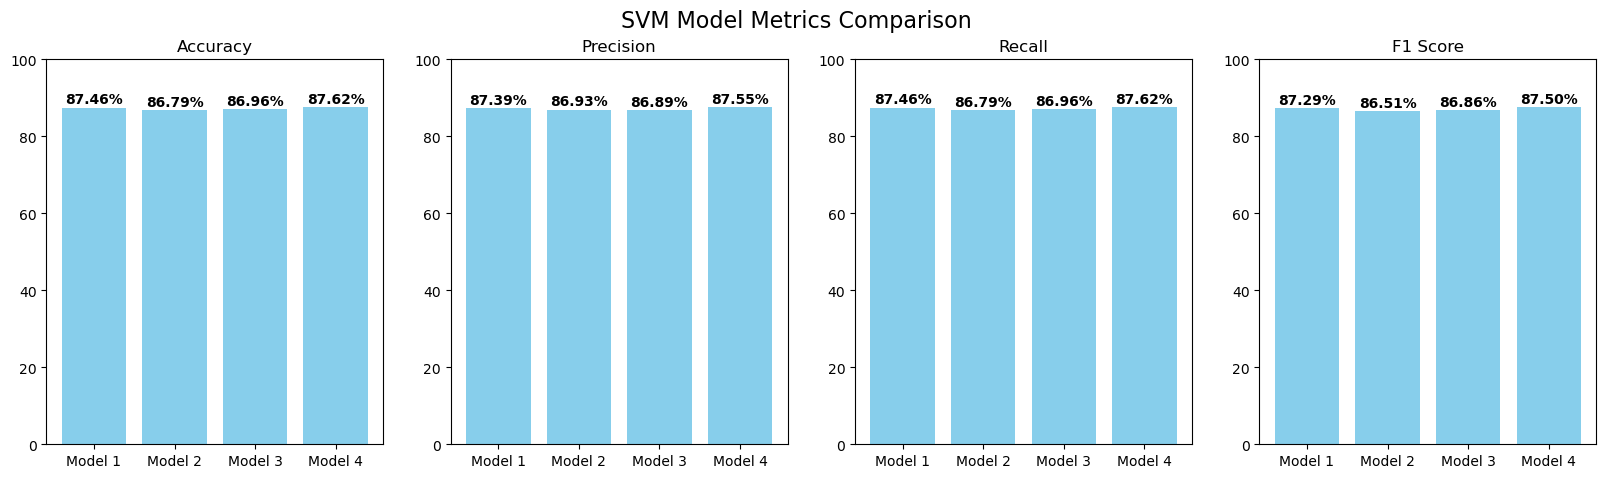

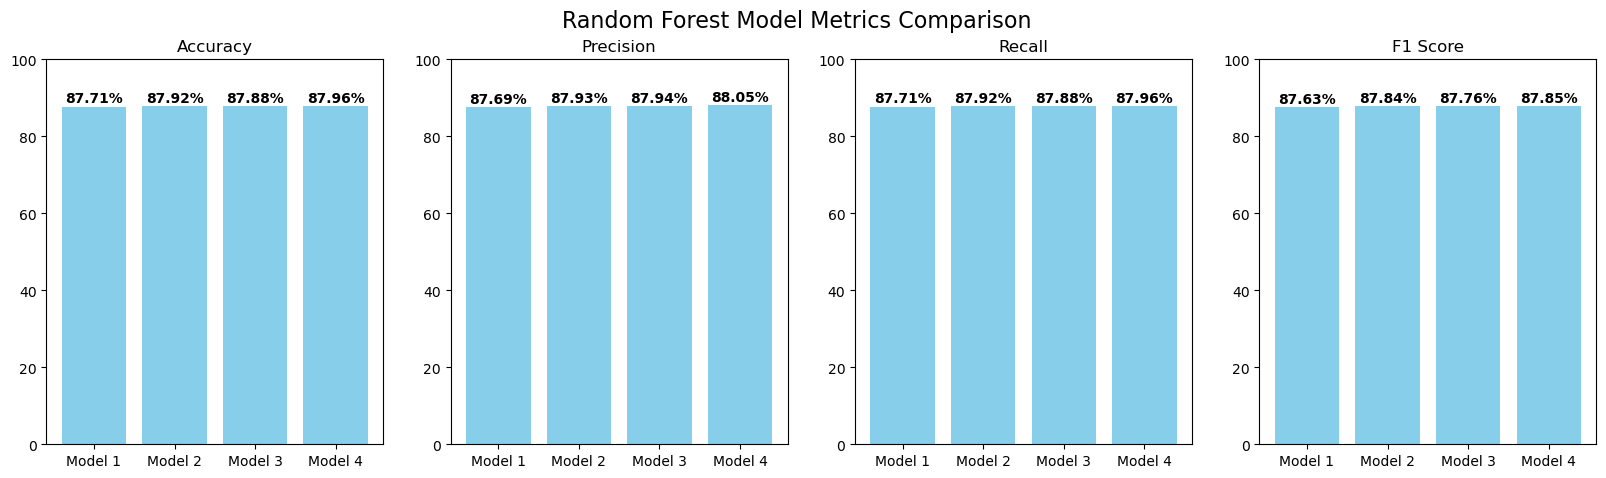

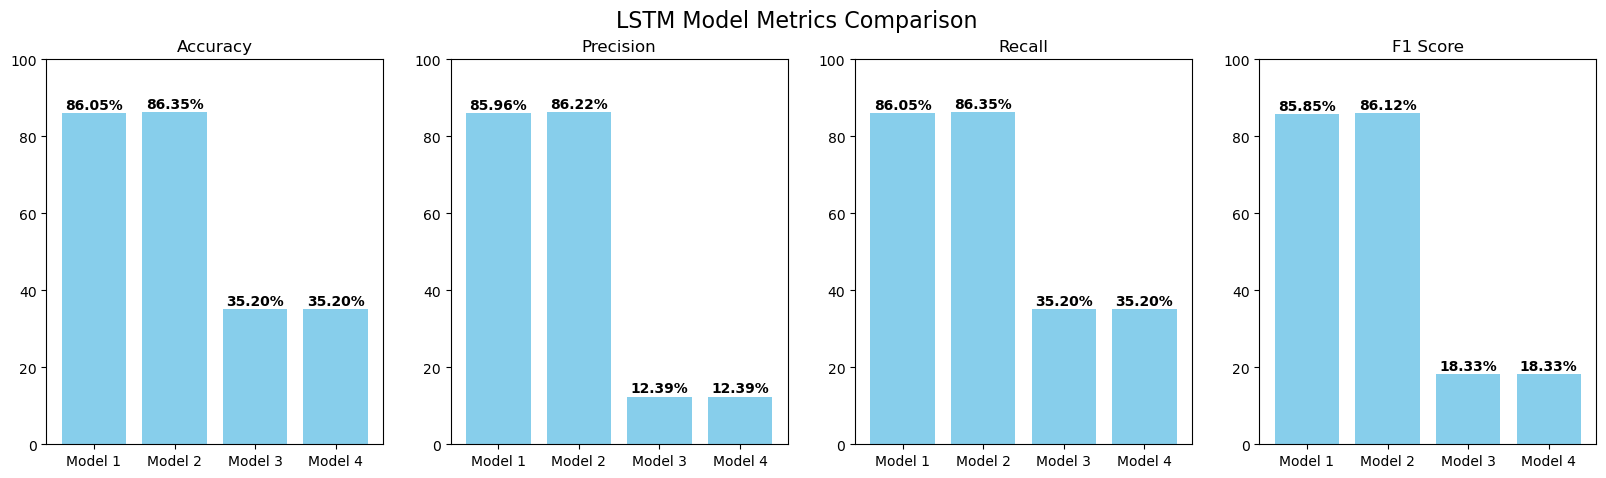

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Model labels
model_labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Logistic Regression metrics
accuracy_logistic = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
precision_logistic = [precision_1, precision_2, precision_3, precision_4]
recall_logistic = [recall_1, recall_2, recall_3, recall_4]
f1_logistic = [f1_1, f1_2, f1_3, f1_4]

# SVM metrics
accuracy_svm = [accuracy_svm_1, accuracy_svm_2, accuracy_svm_3, accuracy_svm_4]
precision_svm = [precision_svm_1, precision_svm_2, precision_svm_3, precision_svm_4]
recall_svm = [recall_svm_1, recall_svm_2, recall_svm_3, recall_svm_4]
f1_svm = [f1_svm_1, f1_svm_2, f1_svm_3, f1_svm_4]

# Random Forest metrics
accuracy_rf = [accuracy_rf_1, accuracy_rf_2, accuracy_rf_3, accuracy_rf_4]
precision_rf = [precision_rf_1, precision_rf_2, precision_rf_3, precision_rf_4]
recall_rf = [recall_rf_1, recall_rf_2, recall_rf_3, recall_rf_4]
f1_rf = [f1_rf_1, f1_rf_2, f1_rf_3, f1_rf_4]

# LSTM metrics
accuracy_lstm = [accuracy_lstm_1, accuracy_lstm_2, accuracy_lstm_3, accuracy_lstm_4]
precision_lstm = [precision_lstm_1, precision_lstm_2, precision_lstm_3, precision_lstm_4]
recall_lstm = [recall_lstm_1, recall_lstm_2, recall_lstm_3, recall_lstm_4]
f1_lstm = [f1_lstm_1, f1_lstm_2, f1_lstm_3, f1_lstm_4]

# Group metrics for each algorithm
logistic_metrics = [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic]
svm_metrics = [accuracy_svm, precision_svm, recall_svm, f1_svm]
rf_metrics = [accuracy_rf, precision_rf, recall_rf, f1_rf]
lstm_metrics = [accuracy_lstm, precision_lstm, recall_lstm, f1_lstm]

# Titles for each metric plot
metric_titles = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Function to plot metrics side by side for a given algorithm
def plot_algorithm_metrics(algorithm_name, metrics):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'{algorithm_name} Model Metrics Comparison', fontsize=16)
    
    for i, metric_values in enumerate(metrics):
        axs[i].bar(model_labels, [value * 100 for value in metric_values], color='skyblue')
        axs[i].set_title(metric_titles[i])
        axs[i].set_ylim([0, 100])
        for j, v in enumerate(metric_values):
            axs[i].text(j, v * 100 + 1, f"{v * 100:.2f}%", ha='center', fontweight='bold')
    
    plt.show()

# Plot metrics side by side for each algorithm
plot_algorithm_metrics("Logistic Regression", logistic_metrics)
plot_algorithm_metrics("SVM", svm_metrics)
plot_algorithm_metrics("Random Forest", rf_metrics)
plot_algorithm_metrics("LSTM", lstm_metrics)
